In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
file_path = 'data/food-consumption.csv'
df = pd.read_csv(file_path)


In [3]:
df.head()

,Country,Real coffee,Instant coffee,Tea,Sweetener,Biscuits,Powder soup,Tin soup,Potatoes,Frozen fish,...,Apples,Oranges,Tinned fruit,Jam,Garlic,Butter,Margarine,Olive oil,Yoghurt,Crisp bread
0,Germany,90,49,88,19,57,51,19,21,27,...,81,75,44,71,22,91,85,74,30,26
1,Italy,82,10,60,2,55,41,3,2,4,...,67,71,9,46,80,66,24,94,5,18
2,France,88,42,63,4,76,53,11,23,11,...,87,84,40,45,88,94,47,36,57,3
3,Holland,96,62,98,32,62,67,43,7,14,...,83,89,61,81,15,31,97,13,53,15
4,Belgium,94,38,48,11,74,37,23,9,13,...,76,76,42,57,29,84,80,83,20,5


In [4]:
df.describe()

,Real coffee,Instant coffee,Tea,Sweetener,Biscuits,Powder soup,Tin soup,Potatoes,Frozen fish,Frozen veggies,Apples,Oranges,Tinned fruit,Jam,Garlic,Butter,Margarine,Olive oil,Yoghurt,Crisp bread
count,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.00000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000
mean,78.562500,39.250000,78.500000,18.000000,60.687500,49.000000,18.312500,12.750000,21.875000,15.87500,66.812500,70.500000,41.937500,55.187500,42.312500,75.812500,69.125000,54.187500,20.562500,27.750000
std,23.145824,23.147354,18.540047,10.532489,19.168442,15.427249,20.178268,9.574271,13.980343,12.78997,17.581122,14.033294,23.256451,22.592679,34.677022,20.910026,26.849891,28.842604,18.337462,25.026652
min,27.000000,10.000000,40.000000,2.000000,22.000000,27.000000,1.000000,2.000000,4.000000,2.00000,22.000000,42.000000,8.000000,16.000000,5.000000,31.000000,24.000000,13.000000,2.000000,3.000000
25%,71.500000,17.000000,62.500000,11.000000,56.500000,36.250000,3.750000,6.500000,13.750000,6.50000,56.750000,65.250000,28.000000,40.250000,11.000000,64.500000,47.750000,29.500000,5.750000,10.500000
50%,89.000000,39.000000,84.500000,18.500000,62.000000,47.000000,11.500000,10.000000,19.500000,13.00000,71.500000,72.000000,43.000000,54.000000,25.500000,83.000000,79.000000,52.500000,14.500000,21.000000
75%,96.000000,54.250000,92.250000,25.750000,74.500000,58.000000,20.000000,17.000000,26.250000,21.50000,81.000000,77.250000,50.750000,72.000000,81.500000,94.000000,94.000000,83.250000,30.250000,31.000000
max,98.000000,86.000000,99.000000,35.000000,91.000000,75.000000,76.000000,39.000000,54.000000,45.00000,87.000000,94.000000,89.000000,91.000000,91.000000,97.000000,97.000000,94.000000,57.000000,93.000000


In [5]:
"""Thought process:
1) each row corresponds to food item, each column corresponds to country
2) matrix should be 20x16
3) Pre-process data with normalization
4)calculate covariance matrix
5) perform eigenvalue decomp
6) extract first two principal components
7)multiple data matrix by top two eigenvectors to transform data
8) scatter plot of two-dimensional representations of the countries using their two principal component
9)
"""

'Thought process:\n1) each row corresponds to food item, each column corresponds to country\n2) matrix should be 20x16\n3) Pre-process data with normalization\n4)calculate covariance matrix\n5) perform eigenvalue decomp\n6) extract first two principal components\n7)multiple data matrix by top two eigenvectors to transform data\n8) scatter plot of two-dimensional representations of the countries using their two principal component\n9)\n'

In [6]:
countries = df.iloc[:, 0]

food_data = df.iloc[:, 1:]

column_means = food_data.mean(axis=0)
centered_data = food_data - column_means
#standadization using z-score
column_stds = food_data.std(axis=0)
standardized_data = centered_data / column_stds

data_matrix = standardized_data.values 


In [7]:

cov_matrix=np.cov(data_matrix, rowvar=False)
#data seems to be clean and has no missing values

In [8]:

eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
#sorted_eigenvals = np.sort(eigenvalues)[::-1]
sorted_indices = np.argsort(eigenvalues)[::-1]
sorted_eigenvectors = eigenvectors[:, sorted_indices]

#Eigenvectors represent the principal components and eigenvalues represent amount of variance explained 
#by each PC
#getting two highest values
top_2_eigenvectors = sorted_eigenvectors[:, :2]
pca_2d = np.dot(standardized_data, top_2_eigenvectors)


/Users/zubairlakhia/opt/anaconda3/lib/python3.9/site-packages/matplotlib/cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/Users/zubairlakhia/opt/anaconda3/lib/python3.9/site-packages/matplotlib/collections.py:197: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)
/Users/zubairlakhia/opt/anaconda3/lib/python3.9/site-packages/matplotlib/text.py:1465: ComplexWarning: Casting complex values to real discards the imaginary part
  x = float(self.convert_xunits(x))
/Users/zubairlakhia/opt/anaconda3/lib/python3.9/site-packages/matplotlib/text.py:1467: ComplexWarning: Casting complex values to real discards the imaginary part
  y = float(self.convert_yunits(y))
/Users/zubairlakhia/opt/anaconda3/lib/python3.9/site-packages/matplotlib/text.py:756: ComplexWarning: Casting complex values to real discards the imaginary part
  posx = float(self.convert_xunits(self._x

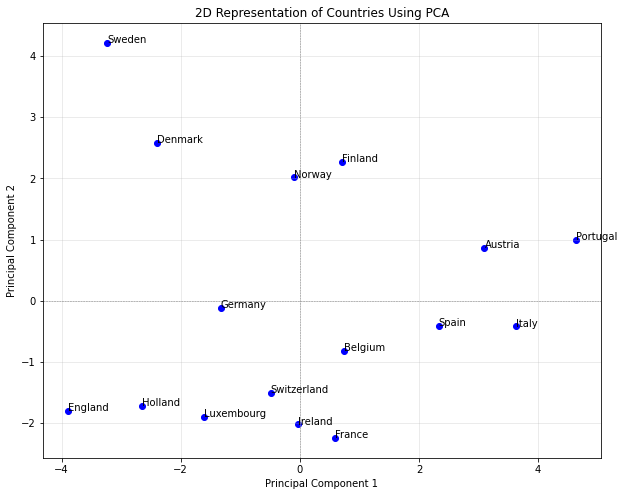

In [9]:
# Scatter plot of the first two principal components
plt.figure(figsize=(10, 8))
plt.scatter(pca_2d[:, 0], pca_2d[:, 1], color='blue')

for i, country in enumerate(countries):
    plt.annotate(country, (pca_2d[i, 0], pca_2d[i, 1]), fontsize=10)
    
    
    
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2D Representation of Countries Using PCA')
plt.axhline(0, color='gray', linestyle='--', linewidth=0.5)
plt.axvline(0, color='gray', linestyle='--', linewidth=0.5)
plt.grid(alpha=0.3)
plt.show()

## Question 2.2

In [10]:
# transposing dataframe so that rows represent food items and the columns represent countries
#https://numpy.org/doc/2.1/reference/generated/numpy.transpose.html
transposed_data = standardized_data.T 
data_matrix = transposed_data.values
#Repeat same process as before
cov_matrix=np.cov(data_matrix, rowvar=False)


In [11]:
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
#sorted_eigenvals = np.sort(eigenvalues)[::-1]
sorted_indices = np.argsort(eigenvalues)[::-1]
sorted_eigenvectors = eigenvectors[:, sorted_indices]

#Eigenvectors represent the principal components and eigenvalues represent amount of variance explained 
#by each PC getting two highest values
top_2_eigenvectors = sorted_eigenvectors[:, :2]
pca_2d = np.dot(data_matrix, top_2_eigenvectors) 

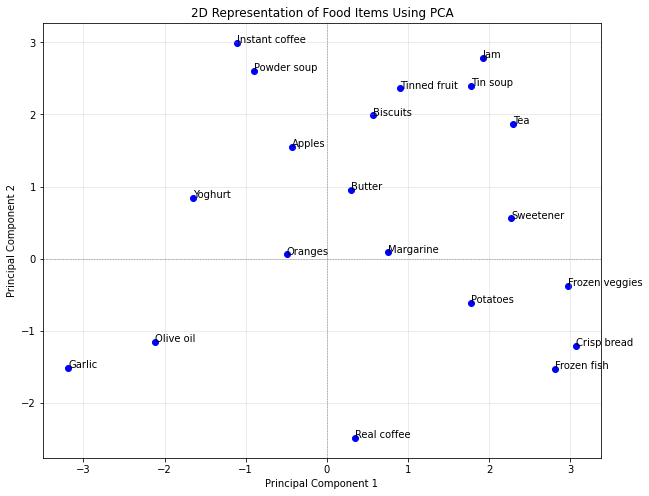

In [12]:
# Scatter plot of the first two principal components for food items
plt.figure(figsize=(10, 8))
plt.scatter(pca_2d[:, 0], pca_2d[:, 1], color='blue')


for i, food in enumerate(food_data):  
    plt.annotate(food, (pca_2d[i, 0], pca_2d[i, 1]), fontsize=10)

# Add labels and title
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2D Representation of Food Items Using PCA')
plt.axhline(0, color='gray', linestyle='--', linewidth=0.5)
plt.axvline(0, color='gray', linestyle='--', linewidth=0.5)
plt.grid(alpha=0.3)
plt.show()